# <raggedright> Beispiel 17.5: Transporteinflüsse auf scheinbare kinetische Parameter

Bearbeitet von Alexander Zirn

Dieses Beispiel befindet sich im Lehrbuch auf der Seite 250-252. Die Nummerierung der aus dem Lehrbuch verwendeten Gleichungen entspricht der Nummerierung im Lehrbuch. Gleichungen, die nur im vorliegenden Beispiel verwendet werden, sind durch einfache fortlaufende Zahlen gekennzeichnet.

In [46]:
# IMPORT SECTION

import numpy as np                     # import of numpy
import matplotlib.pyplot as plt        # import of matplotlib

# 1. Definition der charakteristischen Größen

Um Transporteinflüsse auf die Bestimmung kinetischer Parameter quantifizieren zu können, soll zuerst der Katalysatorwirkungsgrad $\eta_\mathrm{cat}$ definiert werden. Dieser bezieht die mittlere (beobachtete) Reaktionsgeschwindigkeit $r_\mathrm{obs}$ auf die Reaktionsgeschwindigkeit des Referenzfalls ohne Transporteinflüsse $r_\mathrm{ref}$ (intrinsische Reaktionsgeschwindigkeit) (Glg. 17.22).

\begin{align}
\eta_\mathrm{cat}=\frac{r_\mathrm{obs}}{r_\mathrm{ref}}\tag{17.22}
\end{align}

Zudem wird eine Reaktion erster Ordnung angenommen bzgl. der messbaren Konzentration $c_{1,\mathrm{fl}}$ der Komponente $A_1$ in der Gasphase. Diese Konzentration wird vereinfachend mit $c$ bezeichnet. Es ergibt sich für die beobachtete Reaktionsgeschwindigkeit Glg. (2) und Glg. (3) analog für die intrinsische Reaktionsgeschwindigkeit. 

\begin{align}
r_\mathrm{obs}&=k_\mathrm{obs}\,c\tag{1}\\
r_\mathrm{ref}&=k_\mathrm{ref}\,c\tag{2}\\
\end{align}

Aus Glg. (17.22) folgt damit:

\begin{align}
\eta_\mathrm{cat}&=\frac{k_\mathrm{obs}\,c}{k_\mathrm{ref}\,c}=\frac{k_\mathrm{obs}}{k_\mathrm{ref}}\tag{3}
\end{align}


Die Temperaturabhängigkeit der intrinsischen Reaktionsgeschwindigkeitskonstante ist durch den ARRHENIUS-Ansatz gegeben:

\begin{align}
k_\mathrm{ref}\left(T\right)&=k_0\,\mathrm{exp}\left(-\frac{E_\mathrm{A}}{\mathrm{R}\,T}\right),\tag{4}
\end{align}

Aus Glgn. (3) und (4) ergibt sich nun: 

\begin{align}
k_\mathrm{obs}&=\eta_\mathrm{cat}\,k_\mathrm{ref} =
\eta_\mathrm{cat}\,k_0\,\mathrm{exp}\left(-\frac{E_\mathrm{A}}{\mathrm{R}\,T}\right).\tag{5}
\end{align}

Beide Geschwindigkeitskonstanten werden als Funktionen "k_ref" sowie "k_obs" in Python implementiert. Der Funktion zur Berechnung der intrinsischen Geschwindigkeitskonstante "k_ref" werden die inverse Temperatur sowie die wahre Aktivierungsenergie zugewiesen. Der Funktion für die Berechnung der scheinbaren Geschwindigkeitskonstante "k_obs" ruft zusätzlich eine Funktion zur Bestimmung des Katalysatorwirkungsgrades und des THIELE-Moduls auf, die weiter unten erläutert werden. Dafür wird der Funktion auch die BIOT-Zahl übergeben, damit äußere Stofftransportlimitierungen bei der Berechnung des Katalysatorwirkungsgrades auch berücksichtigt werden können (s. Glg. 17.28b).

In [47]:
def k_ref(T_inv, E_A):
    """ reference Arrhenius term

    Parameters
    ----------
    T : array of arbitrary size
        temperature in K

    Returns
    -------
    array of size 1
        reference kinetic constant in s-1
    """

    k_ref = k_0 * np.exp( - (E_A / R) * T_inv)

    return k_ref

In [48]:
def k_obs(T_inv, Bi, E_A):
    """ observable kinetic constant

    Parameters
    ----------
    T : array of arbitrary size
        temperature in K
    Bi : array of size 1
        Biot-number in 1

    Returns
    -------
    array of size 1
        observable kinetic constant in s-1
    """
    k_obs = eta_cat(phi(T_inv, E_A), Bi) * k_ref(T_inv, E_A)
    
    return k_obs


Darüber hinaus kann das Problem auch anhand dimensionsloser Parameter beschrieben werden. Der THIELE-Modul bezieht die Diffusionszeit auf die Reaktionszeit (Glg. 17.20a). 

\begin{align}
\phi^{2}=\frac{L^{2}}{D_\mathrm{1,eff}}\,k_\mathrm{ref}.\tag{17.20a}\\
\end{align}

Der THIELE-Modul ist als Funktion "phi" abhängig von der inversen Temperatur sowie der Aktivierungsenergie wie folgt implementiert:

In [49]:
def phi(T_inv, E_A):
    """ Thiele-modulus

    Parameters
    ----------
    T : array of arbitrary size
        temperature in K

    Returns
    -------
    array of size 1
        Thiele-modulus in 1
    """

    phi = np.sqrt(L**2 * k_ref(T_inv, E_A) / D_1_eff)
    
    return phi

Anhand des THIELE-Moduls sowie der BIOT-Zahl lässt sich der Katalysatorwirkungsgrad wie folgt berechnen:

\begin{align}
\frac{1}{\eta}=\left(\frac{\phi}{\mathrm{tanh}{\phi}}+\frac{\phi^2}{Bi}\right). \tag{17.28b}
\end{align}

Der Katalysatorwirkungsgrad ist als Funktion "eta_cat" abhängig vom THIELE-Modul sowie der BIOT-Zahl implementiert und berücksichtigt im allgemeinen Fall demnach innere und äußere Stofftransporteinflüsse:

In [50]:
def eta_cat(phi_cat, Bi):
    """ catalyst efficiency

    Parameters
    ----------
    T : array of arbitrary size
        temperature in K
    Bi : array of size 1
        Biot-number in 1

    Returns
    -------
    array of size 1
        catalyst efficiency in 1
    """

    eta_cat = (phi_cat / np.tanh(phi_cat) + phi_cat**2 / Bi)**( - 1)

    return eta_cat

# 2. Definition der notwendigen Parameter

Es werden 101 Stützstellen zur Berechnung der Temperaturabhängigkeit verwendet.

In [51]:
N_disc = 101 # discretization

Für den Referenzfall werden typische Zahlenwerte für die erforderlichen Größen angenommen, die in der unten stehenden Implementierung zu sehen sind.

In [52]:
# operation
T_guess = 298.15 # default temperature in K

# reaction
E_A_ref = 100e3      # activation energy in J mol-1
k_0     = 1.193e+19  # Arrhenius pre-factor in s-1
R       = 8.314      # gas constant in J mol-1 K-1

# mass transfer
D_1_eff = 1e-6     # effective diffusivity in m2 s-1
L       = 500e-6   # characteristic length in m

# dimensionless
Bi      = 10    # Biot number in 1
phi_ref = 3     # reference Thiele modulus in 1

# 3. Sensitivität der beobachteten kinetischen Konstante

Um die Auswirkung des Katalysatorwirkungsgrads auf die beobachtete Geschwindigkeitskonstante $k_\mathrm{obs}$ zu ermitteln, wird Gleichung 5 logarithmiert, sodass sich folgende Gleichung ergibt:

\begin{align}
\mathrm{ln}\left(k_\mathrm{obs}\right)=\mathrm{ln}\left(\eta_\mathrm{cat}\,k_0\right)-\frac{E_\mathrm{A}}{\mathrm{R}}\frac{1}{T}.\tag{6}
\end{align}

Der Katalysatorwirkungsgrad sowie der präexponentielle Faktor bestimmen den y-Achsenabschnitt und die Aktivierungsenergie bestimmt die Steigung. 

In [53]:
T_span = np.linspace(273, 500, N_disc) # temperature span in K
T_inv_span = np.linspace(1 / T_span[-1], 1/ T_span[0], N_disc) # inverse temperature span in K-1

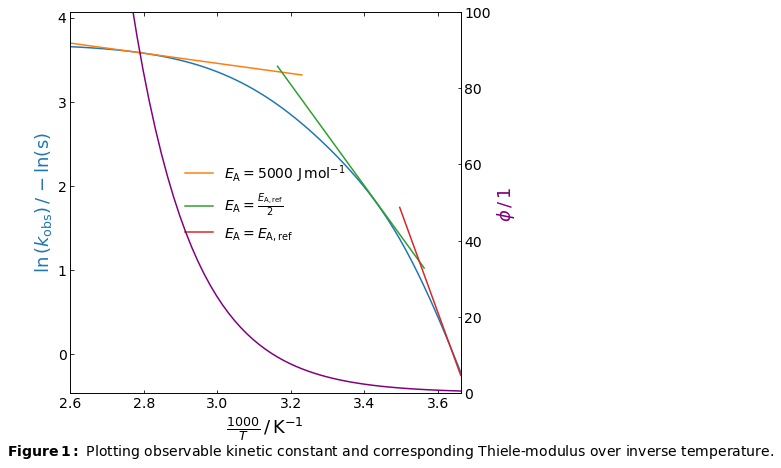

In [54]:
fig = plt.subplots(1,1, figsize=(7,7))

ax1 = plt.subplot(1, 1,1)         
ax1.set_xlabel(r"$\frac{1000}{T}\,/\,\mathrm{K^{-1}}$ ", fontsize = 18) # adds label to y-axis 
ax1.set_ylabel(r"$\mathrm{ln}\,\left(k_\mathrm{obs}\right)\,/\,-\mathrm{ln(s)}$", fontsize=18, color= 'tab:blue') # adds label to x-axis
#ax1.set_xlim(T_inv_span[0]/1e-3, T_inv_span[-1]/1e-3) # sets limits for x-axis
ax1.set_xlim(2.6, T_inv_span[-1]/1e-3) # sets limits for x-axis
ax1.plot(T_inv_span/1e-3, np.log(k_obs(T_inv_span, Bi, E_A_ref))) # plotting observable kinetic constant 
ax1.plot(T_inv_span[20:75]/1e-3, -5000/R * T_inv_span[20:75] +  5.26, label=r'$E_\mathrm{A} = 5000~\mathrm{J\,mol^{-1}}$') # plotting tangent for strong external limitations
ax1.plot(T_inv_span[70:95]/1e-3, -E_A_ref/(2*R) * T_inv_span[70:95]+22.45, label = r'$E_\mathrm{A} = \frac{E_\mathrm{A,ref}}{2}$') # plotting tangent for strong internal limitations
ax1.plot(T_inv_span[90:]/1e-3, -E_A_ref/R * T_inv_span[90:]+43.8, label=r'$E_\mathrm{A} = E_\mathrm{A,ref}$') # plotting tangent in intrinsic regime
ax1.tick_params(labelsize=14,direction='in', right=True, left=True, top=True, bottom=True) # setting ticks
ax1.legend(frameon = False, fontsize = 14, loc = 'center') # setting legend

ax2 = ax1.twinx() # adds second y-axis
ax2.set_ylabel(r"$\phi\,/\,1$ ", fontsize = 18, color = 'purple') # adds label to y-axis 
ax2.plot(T_inv_span/1e-3, phi(T_inv_span, E_A_ref),label = r'$\vartheta $',color='purple') # plotting Thiele-modulus over inverse temperature span
ax2.tick_params(labelsize=14,direction='in',axis ='y') # setting ticks
ax2.set_ylim(0, 100) # sets limits for x-axis
plt.figtext(0,0.0,r"$\mathbf{Figure\,1:}$ Plotting observable kinetic constant and corresponding Thiele-modulus over inverse temperature.", fontsize=14, horizontalalignment='left') # subtitle to the figure 
plt.show()

In Abbildung 1 wird die beobachtete Geschwindigkeitskonstante $\mathrm{ln}\left(k_\mathrm{obs}\right)$ über die inverse Temperature $T^{-1}$ aufgetragen. Für Limitierungen durch Porendiffusion beträgt die beobachtete Aktivierungsenergie $E_\mathrm{A} = E_\mathrm{ref}/2$ (s. mittlere Temperatur bzw. mittlere inverse Temperatur im Diagramm). Für ausgeprägte Diffusionslimitierungen im Film beträgt die beobachtete Aktivierungsenergie sogar nur noch etwa $E_\mathrm{A} =5000\,\mathrm{J~mol^{-1}}$ (s. hohe Temperatur bzw. niedrige inverse Temperatur im Diagramm). Im intrinsischen Regime ohne Limitierungen kann die wahre Aktivierungsenergie von $E_\mathrm{A,ref}$ gemessen werden (s. niedrige Temperatur bzw. hohe inverse Temperatur im Diagramm). Für jede der ermittelten scheinbaren Aktivierungenergien kann mittels des ARRHENIUS-Ansatzes eine temperaturabhängige Reaktionsgeschwindigkeitskonstante bestimmt werden. Die resultierenden Geraden bilden Tangenten am Verlauf von $k_\mathrm{obs}\left(T\right)$. 

Für kleine inverse Temperaturen bzw. größere Temperaturen, also im Fall äußerer Stofftransportlimitierungen, stimmt der Verlauf von $\mathrm{ln}\left(k_\mathrm{obs}\right)$ mit der Tangente überein. Unter diesen Bedingungen ist die intrinsische Reaktionsgeschwindigkeit groß, aber der beobachtete Wert klein, da der Stofftransport durch den Film die effektive Reaktionsgeschwindigkeit begrenzt. Die beobachtete Aktivierungsenergie beschreibt praktisch die Temperaturabhängigkeit der Diffusion durch den äußeren Film. Eine Überlagerung mit der Reaktion ist nicht vorhanden, da im Film keine Reaktion stattfindet.

Für mittlere inverse Temperaturen, also im Fall innerer Stofftransportlimitierungen, kann der Verlauf von $\mathrm{ln}\left(k_\mathrm{obs}\right)$ ebenfalls mit einer Tangente angenähert werden, die aber eine größere Steigung aufgrund größerer scheinbarer Aktivierungsenergie aufweist. In diesem Fall ist die Porendiffusion limitierend und die beobachtete Temperaturabhängigkeit beschreibt die des Zusammenspiels zwischen Reaktion und Porendiffusion.

Bei großer inverser Temperatur (geringe Temperatur) ist die Reaktionsgeschwindigkeit so langsam, dass sie den limitierenden Faktor darstellt. Entsprechend wird die beobachtete Reaktionsgeschwindigkeit nicht durch innere oder äußere Stofftransporteffekte beeinflusst und entspricht demnach der intrinsischen Reaktionsgeschwindigkeit. Gleiches gilt für die kinetischen Parameter.

Außerdem ist in Abbildung 1 der THIELE-Modul als Funktion der Temperatur aufgetragen. Dieser ist auf die Referenztemperatur $T_\mathrm{ref} =298\,\mathrm{K}$ bezogen und steigt deshalb mit steigender Temperatur bzw. sinkender inverser Temperatur exponential an, entsprechend dem ARRHENIUS-Ansatz.